In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import roc_curve, roc_auc_score,auc,RocCurveDisplay

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aviakompaniya/sample_submission.csv
/kaggle/input/aviakompaniya/train_dataset.csv
/kaggle/input/aviakompaniya/test_dataset.csv


In [2]:
df = pd.read_csv("../input/aviakompaniya/train_dataset.csv")
df2 = pd.read_csv("../input/aviakompaniya/test_dataset.csv")
sample_submission = pd.read_csv('../input/aviakompaniya/sample_submission.csv')
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [3]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Female,Loyal Customer,54,Personal Travel,Eco,1068,1,4,1,...,4,4,1,4,4,4,3,21,12.0,0
9996,9997,Female,Loyal Customer,54,Business travel,Eco Plus,1399,4,1,1,...,4,4,4,4,1,4,4,34,21.0,0
9997,9998,Male,Loyal Customer,46,Business travel,Business,1440,3,3,2,...,4,4,4,4,3,4,3,37,38.0,1
9998,9999,Female,Loyal Customer,41,Business travel,Business,90,4,1,4,...,3,4,5,5,5,4,5,64,210.0,1


## Ma'lumotlarni tahlil qilamiz

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [5]:
df['Class'].value_counts()

Business    5048
Eco         4251
Eco Plus     701
Name: Class, dtype: int64

In [6]:
df['Gender'].value_counts()

Female    5169
Male      4831
Name: Gender, dtype: int64

In [7]:
df['Customer Type'].value_counts()

Loyal Customer       8307
disloyal Customer    1693
Name: Customer Type, dtype: int64

In [8]:
df['Type of Travel'].value_counts()

Business travel    7079
Personal Travel    2921
Name: Type of Travel, dtype: int64

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 4000 non-null   int64  
 1   Gender                             4000 non-null   object 
 2   Customer Type                      4000 non-null   object 
 3   Age                                4000 non-null   int64  
 4   Type of Travel                     4000 non-null   object 
 5   Class                              4000 non-null   object 
 6   Flight Distance                    4000 non-null   int64  
 7   Inflight wifi service              4000 non-null   int64  
 8   Departure/Arrival time convenient  4000 non-null   int64  
 9   Ease of Online booking             4000 non-null   int64  
 10  Gate location                      4000 non-null   int64  
 11  Food and drink                     4000 non-null   int64

In [10]:
df.corrwith(df['satisfaction']).abs().sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.504986
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048650
Departure Delay in Minutes           0.042960
Gate location                        0.007169
id                                   0.002931
dtype: float64

## Ma'lumotlarga ishlov berish

In [11]:
df['satisfaction'].value_counts()/len(df)

0    0.5
1    0.5
Name: satisfaction, dtype: float64

Ma'lumotlar juda yaxshi.


In [12]:
df = df.drop(columns=['id','Gate location','Departure Delay in Minutes'],axis=1)
df2 = df2.drop(columns=['id','Gate location','Departure Delay in Minutes'],axis=1)


In [13]:
dict = {'Eco':0, 'Eco Plus':1, 'Business':2}
df['Class']=df['Class'].map(dict)
print(df['Class'].value_counts())

dict = {'Eco':0, 'Eco Plus':1, 'Business':2}
df2['Class']=df2['Class'].map(dict)
print(df2['Class'].value_counts())


2    5048
0    4251
1     701
Name: Class, dtype: int64
2    2030
0    1691
1     279
Name: Class, dtype: int64


In [14]:
dict = {'Female':0, 'Male':1}
df['Gender']=df['Gender'].map(dict)
print(df['Gender'].value_counts())

dict = {'Female':0, 'Male':1}
df2['Gender']=df2['Gender'].map(dict)
print(df2['Gender'].value_counts())

0    5169
1    4831
Name: Gender, dtype: int64
1    2013
0    1987
Name: Gender, dtype: int64


In [15]:
dict = {'disloyal Customer':0, 'Loyal Customer':1}
df['Customer Type'] = df['Customer Type'].map(dict)
print(df['Customer Type'].value_counts())

dict = {'disloyal Customer':0, 'Loyal Customer':1}
df2['Customer Type'] = df2['Customer Type'].map(dict)
print(df2['Customer Type'].value_counts())

1    8307
0    1693
Name: Customer Type, dtype: int64
1    3264
0     736
Name: Customer Type, dtype: int64


In [16]:
dict = {'Personal Travel':0, 'Business travel':1}
df['Type of Travel'] = df['Type of Travel'].map(dict)
print(df['Type of Travel'].value_counts())

dict = {'Personal Travel':0, 'Business travel':1}
df2['Type of Travel'] = df2['Type of Travel'].map(dict)
print(df2['Type of Travel'].value_counts())

1    7079
0    2921
Name: Type of Travel, dtype: int64
1    2871
0    1129
Name: Type of Travel, dtype: int64


In [17]:
df.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [18]:
df2.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Arrival Delay in Minutes             19
dtype: int64

## ML ga tayyorgarlik

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)
# stratified_split.split funksiyasi indekslar qaytaradi
for train_index,test_index in stratified_split.split(df, df['Gender']):
  strat_train = df.loc[train_index]
  strat_test = df.loc[test_index]

X_train = strat_train.drop('satisfaction',axis=1)
y = strat_train['satisfaction'].copy()
X_test = strat_test.drop('satisfaction', axis=1)
y_test = strat_test['satisfaction'].copy()

In [20]:
X_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes
5489,0,1,22,1,0,351,1,5,5,1,1,2,1,2,5,2,2,2,1,0.0
1961,0,1,44,1,1,216,1,2,2,5,3,2,1,1,1,1,2,1,4,0.0
8502,0,1,43,1,2,3487,5,5,5,5,5,4,4,4,4,4,5,4,3,0.0
1014,0,1,50,0,0,164,3,1,3,1,1,2,1,1,3,1,3,1,1,0.0
4709,1,1,29,1,2,2566,1,1,1,5,5,5,5,3,5,5,5,4,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9183,1,1,48,1,0,954,5,4,4,5,5,5,5,5,5,1,1,3,5,0.0
199,1,1,58,1,1,160,5,1,1,5,5,5,5,5,3,3,4,3,5,0.0
2436,0,1,10,1,1,2419,2,4,4,2,4,2,2,5,3,3,2,4,2,0.0
2486,0,1,15,0,0,254,2,3,0,3,0,3,3,3,3,3,3,3,3,40.0


## **Pipeline**

### **To'liq pipeline**

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

pipeline = Pipeline([
          ('std_scaler', StandardScaler()),
          ('imputer', SimpleImputer(strategy='median'))])
    
#full_pipeline = ColumnTransformer([
#   ('num', num_pipeline)])

        

In [22]:
X_prepared = pipeline.fit_transform(X_train)
X_test_prepared = pipeline.fit_transform(X_test)

X_prepared

array([[-0.96688144,  0.45256964, -1.16723006, ..., -1.42912895,
        -1.76534147, -0.38219285],
       [-0.96688144,  0.45256964,  0.31730897, ..., -2.27803239,
         0.52433618, -0.38219285],
       [-0.96688144,  0.45256964,  0.24982992, ...,  0.26867794,
        -0.2388897 , -0.38219285],
       ...,
       [-0.96688144,  0.45256964, -1.97697862, ...,  0.26867794,
        -1.00211559, -0.38219285],
       [-0.96688144,  0.45256964, -1.63958339, ..., -0.5802255 ,
        -0.2388897 ,  0.66189386],
       [ 1.03425297,  0.45256964,  0.7896623 , ..., -1.42912895,
         0.52433618,  0.32256568]])

## **Eng yaxshi k ni topish**

### **`for` yordamida**

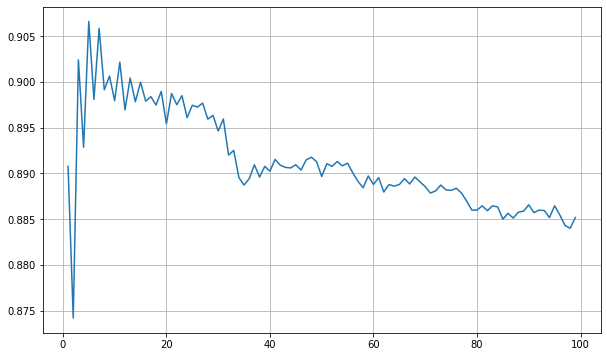

In [23]:
f1 = []
for k in range(1,100):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_prepared, y)
  y_predict = knn.predict(X_test_prepared)
  f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,100),f1)
plt.grid()
plt.show()

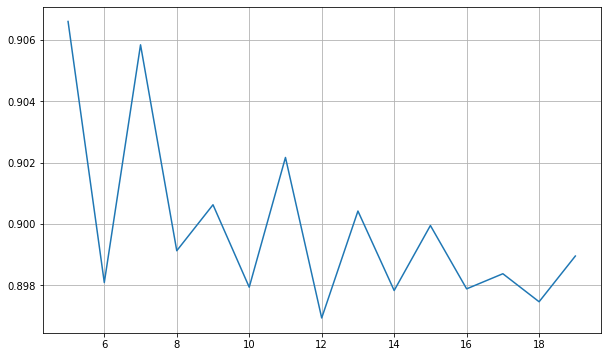

In [24]:
# Yaqinlashtirib ko'ramiz
f1 = []
for k in range(5,20):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_prepared, y)
  y_predict = knn.predict(X_test_prepared)
  f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(5,20),f1)
plt.grid()
plt.show()

## **ML**

### **KNN**

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2004
           1       0.94      0.87      0.91      1996

    accuracy                           0.91      4000
   macro avg       0.91      0.91      0.91      4000
weighted avg       0.91      0.91      0.91      4000

Model aniqligi: 0.90925


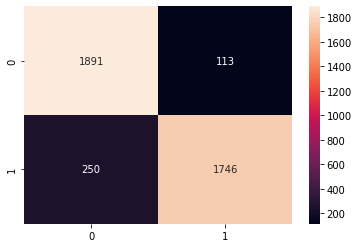

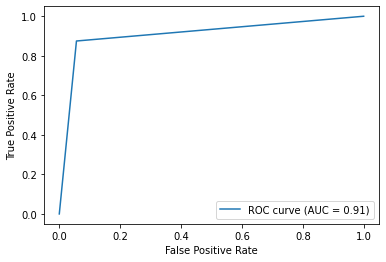

In [25]:
#k-NN
knn = KNeighborsClassifier(n_neighbors=7)#k ni qiymati
knn.fit(X_prepared, y)
X_test_prepared = pipeline.transform(X_test)
y_pred = knn.predict(X_test_prepared)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()



### **Logistic Regression**

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2004
           1       0.87      0.85      0.86      1996

    accuracy                           0.86      4000
   macro avg       0.86      0.86      0.86      4000
weighted avg       0.86      0.86      0.86      4000

Model aniqligi: 0.863


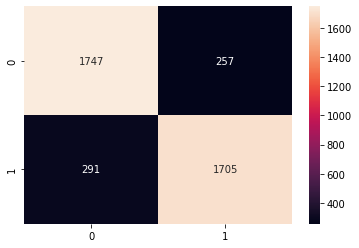

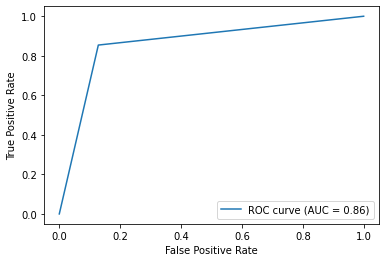

In [26]:
# Modelni tuzamiz (training)
LR_model = LogisticRegression()
LR_model.fit(X_prepared, y)

# Modelni baholaymiz
y_pred = LR_model.predict(X_test_prepared)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### **Support Vector Machines**

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2004
           1       0.94      0.93      0.93      1996

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000

Model aniqligi: 0.9355


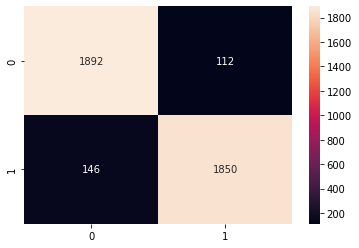

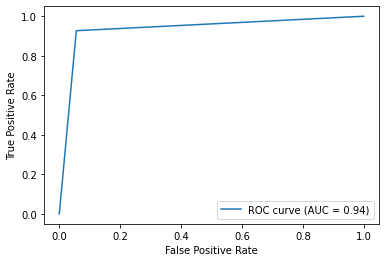

In [27]:
svm_model = SVC()
svm_model.fit(X_prepared, y)

# Modelni baholaymiz
y_pred = svm_model.predict(X_test_prepared)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### **Decision Tree**

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2004
           1       0.92      0.92      0.92      1996

    accuracy                           0.92      4000
   macro avg       0.92      0.92      0.92      4000
weighted avg       0.92      0.92      0.92      4000

Model aniqligi: 0.92375


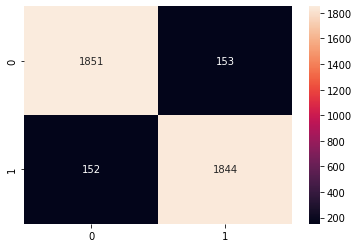

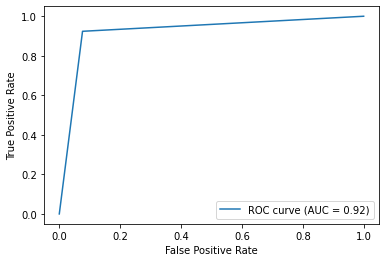

In [28]:
# Model tuzamiz (training)
tree_model = DecisionTreeClassifier()
tree_model.fit(X_prepared, y)

# Modelni baholaymiz
y_pred = tree_model.predict(X_test_prepared)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### **Random Forest**

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2004
           1       0.94      0.93      0.94      1996

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000

Model aniqligi: 0.93575


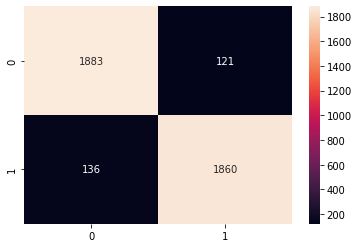

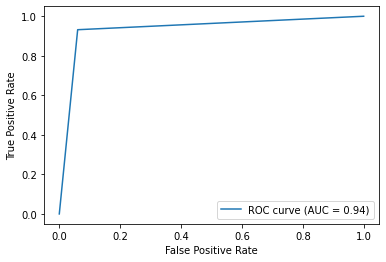

In [29]:
# Modelni tuzamiz (training)
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_prepared, y)

# Modelni baholaymiz
y_pred = RF_model.predict(X_test_prepared)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### **Navie Bayes**

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      2004
           1       0.88      0.83      0.85      1996

    accuracy                           0.86      4000
   macro avg       0.86      0.86      0.86      4000
weighted avg       0.86      0.86      0.86      4000

Model aniqligi: 0.85625


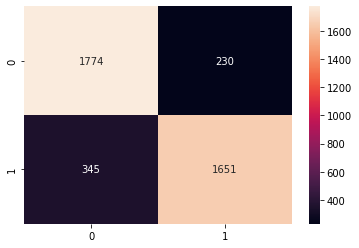

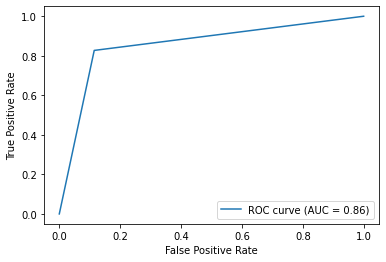

In [30]:
# Modelni tuzamiz
nb_model = GaussianNB()
nb_model.fit(X_prepared,y)

# Modelni baholaymiz
y_pred = nb_model.predict(X_test_prepared)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### **XGBoost**

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2004
           1       0.95      0.95      0.95      1996

    accuracy                           0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000

Model aniqligi: 0.94975


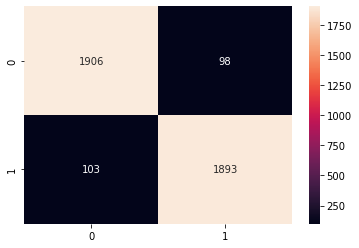

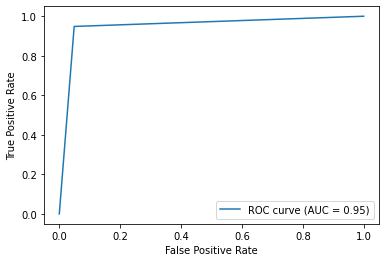

In [31]:
# Model tuzamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(X_prepared, y)

# Modelni baholaymiz
y_pred = xgb_model.predict(X_test_prepared)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### **Baholash**

### **Jaccard index**

In [32]:
jaccard_score(y_test, y_predict)

0.816452686638136

### **Confusion matrix**

Model aniqligi: 0.9035


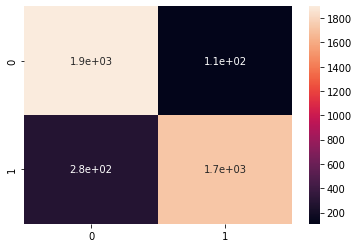

In [33]:
sns.heatmap(confusion_matrix(y_test,y_predict), annot=True)
print("Model aniqligi:", accuracy_score(y_test,y_predict))
plt.show()

### **Precision, recall, F1**

In [34]:
precision = precision_score(y_test,y_predict)
recall = recall_score(y_test,y_predict)
f1 = f1_score(y_test,y_predict)
accuracy = accuracy_score(y_test,y_predict)
print('precision:',precision)
print('recall:',recall)
print('f1:',f1)
print('accuracy:',accuracy)

precision: 0.9413377192982456
recall: 0.8602204408817635
f1: 0.8989528795811518
accuracy: 0.9035


In [35]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2004
           1       0.94      0.86      0.90      1996

    accuracy                           0.90      4000
   macro avg       0.91      0.90      0.90      4000
weighted avg       0.91      0.90      0.90      4000



### **Cross-validation yordamida tekshiramiz**

In [36]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X_test_prepared, y = y_test, cv = 5)


#Modelni baholash
print("Model aniqligi:", accuracy_score(y_test,y_pred))
print('Classification Report: \n', classification_report(y_test, predict))

Model aniqligi: 0.94975
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      2004
           1       0.94      0.85      0.89      1996

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000



### **Eng yaxshi model**

### **XGBoost**

In [37]:
# Modelni tuzamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(X_prepared, y)

# Modelni baholaymiz
X_test_prepared = pipeline.fit_transform(df2)
y_pred_xgb = xgb_model.predict(X_test_prepared)

In [38]:
sample_submission['satisfaction'] = y_pred_xgb
sample_submission.to_csv("submission.csv", index=False)

pd.read_csv('submission.csv')

,id,satisfaction
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
3995,3996,1
3996,3997,0
3997,3998,0
3998,3999,1
